In [176]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [177]:
import seaborn as sns

In [178]:
train_data = pd.read_csv(r"C:\Users\shiva\Desktop\Python\Loan_prediction\train_data.csv")

In [179]:
pd.set_option('display.max.columns',None)

pd.set_option('display.precision', 2)

# Getting to know data 

In [180]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [181]:
train_data.describe(include = 'all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.00,614.00,592.00,600.00,564.00,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001846,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.46,1621.25,146.41,342.00,0.84,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.04,2926.25,85.59,65.12,0.36,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.00,0.00,9.00,12.00,0.00,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.50,0.00,100.00,360.00,1.00,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.50,1188.50,128.00,360.00,1.00,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.00,2297.25,168.00,360.00,1.00,NaN,NaN


# Data Cleaning

In [182]:
train_data1 = train_data.copy()

In [183]:
#changing name of few columns
train_data1.rename(columns = {"ApplicantIncome" : "Applicant_Income", "CoapplicantIncome" : "Coapplicant_Income",
                             "LoanAmount" : "Loan_Amount"}, inplace  = True)

In [184]:
# changing index to Loan_ID
train_data1.set_index("Loan_ID", inplace = True)

In [185]:
#changing data type of categorical variables from 'object' to 'categorical'
cat_var = train_data1.columns[[0,1,2,3,4,9,10,11]]
for col in cat_var:
    train_data1[col] = pd.Categorical(train_data1[col])

In [186]:
#changing data type of Applicant_income from 'int to 'float'
train_data1["Applicant_Income"] = train_data1["Applicant_Income"].astype('float')

# Data Eploration

In [187]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Gender              601 non-null    category
 1   Married             611 non-null    category
 2   Dependents          599 non-null    category
 3   Education           614 non-null    category
 4   Self_Employed       582 non-null    category
 5   Applicant_Income    614 non-null    float64 
 6   Coapplicant_Income  614 non-null    float64 
 7   Loan_Amount         592 non-null    float64 
 8   Loan_Amount_Term    600 non-null    float64 
 9   Credit_History      564 non-null    category
 10  Property_Area       614 non-null    category
 11  Loan_Status         614 non-null    category
dtypes: category(8), float64(4)
memory usage: 29.6+ KB


In [188]:
train_data1.describe(include = 'all')

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,614.00,614.00,592.00,600.00,564.0,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,2.0,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,1.0,Semiurban,Y
freq,489,398,345,480,500,NaN,NaN,NaN,NaN,475.0,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.46,1621.25,146.41,342.00,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.04,2926.25,85.59,65.12,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.00,0.00,9.00,12.00,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.50,0.00,100.00,360.00,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.50,1188.50,128.00,360.00,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.00,2297.25,168.00,360.00,NaN,NaN,NaN


In [189]:
#frequency table of categorical variables w.r.t loan status
cat_var = train_data1.columns[[0,1,2,3,4,9,10]]
for col in cat_var :
    output = pd.crosstab(index = train_data1[col], columns = train_data1['Loan_Status'], margins = True, normalize = True)
    print(f"Frequency Table for variable '{col}' : \n {output} \n")

Frequency Table for variable 'Gender' : 
 Loan_Status     N     Y   All
Gender                       
Female       0.06  0.12  0.19
Male         0.25  0.56  0.81
All          0.31  0.69  1.00 

Frequency Table for variable 'Married' : 
 Loan_Status     N     Y   All
Married                      
No           0.13  0.22  0.35
Yes          0.18  0.47  0.65
All          0.31  0.69  1.00 

Frequency Table for variable 'Dependents' : 
 Loan_Status     N     Y   All
Dependents                   
0            0.18  0.40  0.58
1            0.06  0.11  0.17
2            0.04  0.13  0.17
3+           0.03  0.06  0.09
All          0.31  0.69  1.00 

Frequency Table for variable 'Education' : 
 Loan_Status      N     Y   All
Education                     
Graduate      0.23  0.55  0.78
Not Graduate  0.08  0.13  0.22
All           0.31  0.69  1.00 

Frequency Table for variable 'Self_Employed' : 
 Loan_Status       N     Y   All
Self_Employed                  
No             0.27  0.59  0.86
Yes   

# Visualizing data

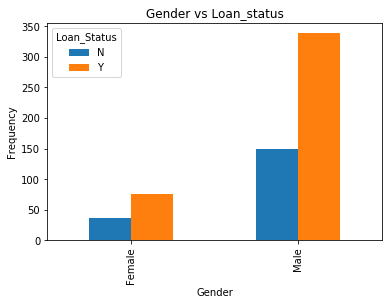

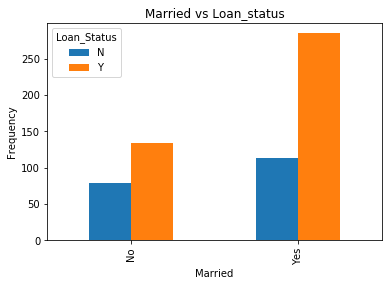

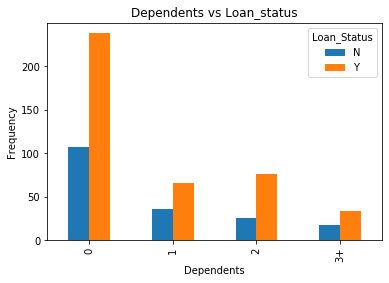

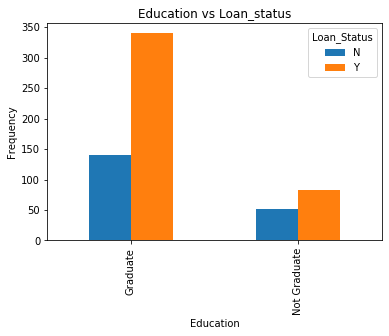

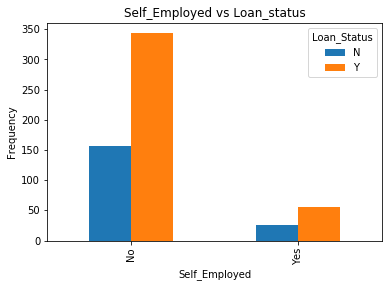

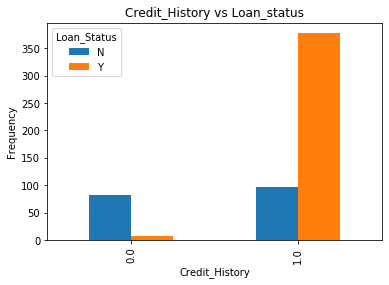

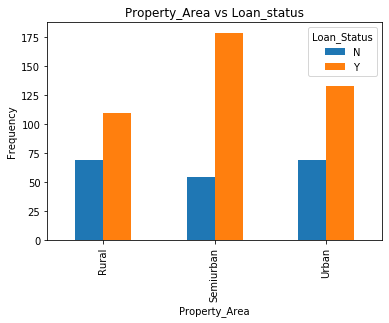

In [190]:
cat_var = train_data1.columns[[0,1,2,3,4,9,10]]
for col in cat_var :
    pd.crosstab(index = train_data1[col], columns = train_data1['Loan_Status']).plot(kind = 'bar')
    plt.title(f'{col} vs Loan_status')
    plt.ylabel('Frequency')

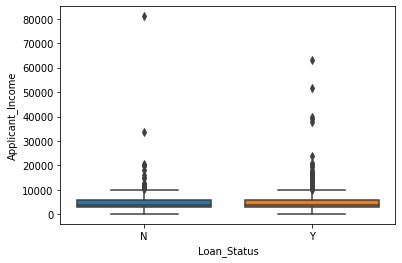

In [191]:
#understanding relationship of continous independent variables with dependent variable(Loan_Satus)
sns.boxplot(y = 'Applicant_Income', x = 'Loan_Status', data = train_data1)

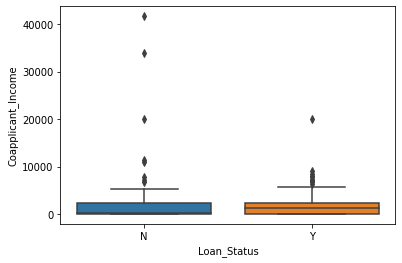

In [192]:
sns.boxplot(y = 'Coapplicant_Income', x = 'Loan_Status', data = train_data1)

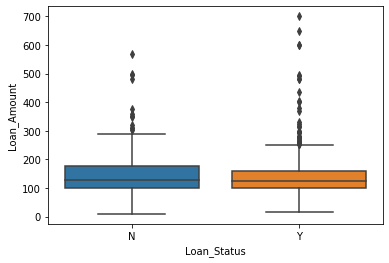

In [193]:
sns.boxplot(y = 'Loan_Amount', x = 'Loan_Status', data = train_data1)

In [194]:
#deleted rows where values in Credit History column are missing
drop_rows = train_data1[train_data1['Credit_History'].isnull()].index
train_data1.drop(labels = drop_rows, axis = 0, inplace = True)

In [195]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Gender              552 non-null    category
 1   Married             561 non-null    category
 2   Dependents          549 non-null    category
 3   Education           564 non-null    category
 4   Self_Employed       538 non-null    category
 5   Applicant_Income    564 non-null    float64 
 6   Coapplicant_Income  564 non-null    float64 
 7   Loan_Amount         543 non-null    float64 
 8   Loan_Amount_Term    550 non-null    float64 
 9   Credit_History      564 non-null    category
 10  Property_Area       564 non-null    category
 11  Loan_Status         564 non-null    category
dtypes: category(8), float64(4)
memory usage: 27.3+ KB


In [196]:
train_data1.loc[train_data1['Loan_Status'] == 'N', 'Loan_Amount'].mean()

149.03550295857988

In [197]:
train_data1.loc[train_data1['Loan_Status'] == 'Y', 'Loan_Amount'].describe()

count    374.00
mean     143.30
std       82.16
min       17.00
25%      100.00
50%      127.00
75%      161.75
max      700.00
Name: Loan_Amount, dtype: float64

In [198]:
train_data1['Loan_Amount_Term'].unique()

array([360., 120.,  nan, 180.,  60., 300., 480., 240.,  36.,  84.])

Filling missing values
 

In [199]:
train_data1['Gender'].fillna(value = "Male", axis = 0, inplace = True)

train_data1['Married'].fillna(value = "Yes", axis = 0, inplace = True)

train_data1['Dependents'].fillna(value = '0', axis = 0, inplace = True)

train_data1['Self_Employed'].fillna(value = 'No', axis = 0, inplace = True)

train_data1['Loan_Amount'].fillna(value = 143.0, axis = 0, inplace = True)

train_data1['Loan_Amount_Term'].fillna(value = 360.0, axis = 0, inplace = True)

# Implementing Model

In [200]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [201]:
import statsmodels.api as sm

In [202]:
train_data1['Credit_History'] = train_data1['Credit_History'].astype('uint8')

In [203]:
#creating dummy varibles to translate arbitarary text data into numerical data
cat_vars = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(train_data1[var], prefix=var)
    data1 = train_data1.join(cat_list)
    train_data1 = data1

In [204]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, LP001002 to LP002990
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   564 non-null    category
 1   Married                  564 non-null    category
 2   Dependents               564 non-null    category
 3   Education                564 non-null    category
 4   Self_Employed            564 non-null    category
 5   Applicant_Income         564 non-null    float64 
 6   Coapplicant_Income       564 non-null    float64 
 7   Loan_Amount              564 non-null    float64 
 8   Loan_Amount_Term         564 non-null    float64 
 9   Credit_History           564 non-null    uint8   
 10  Property_Area            564 non-null    category
 11  Loan_Status              564 non-null    category
 12  Gender_Female            564 non-null    uint8   
 13  Gender_Male              564 non-null    uint8   
 14  Mar

In [205]:
to_keep = train_data1.columns[[5,6,7,8,9,13,15,17,18,19,20,23,25,26,28]]

In [206]:
data_final = train_data1[to_keep]

In [207]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, LP001002 to LP002990
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Applicant_Income         564 non-null    float64
 1   Coapplicant_Income       564 non-null    float64
 2   Loan_Amount              564 non-null    float64
 3   Loan_Amount_Term         564 non-null    float64
 4   Credit_History           564 non-null    uint8  
 5   Gender_Male              564 non-null    uint8  
 6   Married_Yes              564 non-null    uint8  
 7   Dependents_1             564 non-null    uint8  
 8   Dependents_2             564 non-null    uint8  
 9   Dependents_3+            564 non-null    uint8  
 10  Education_Graduate       564 non-null    uint8  
 11  Self_Employed_Yes        564 non-null    uint8  
 12  Property_Area_Semiurban  564 non-null    uint8  
 13  Property_Area_Urban      564 non-null    uint8  
 14  Loan_Status_Y      

# Train Data

In [208]:
X = data_final.drop('Loan_Status_Y', axis = 1)
y = data_final['Loan_Status_Y']

In [209]:
from sklearn.model_selection import train_test_split

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [211]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)

In [212]:
model.fit(X_train, y_train)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [220]:
intercept = model.intercept_
print(f'Intercept is {intercept}')

Intercept is [-2.41961967]


In [242]:
coef = model.coef_.reshape(14,)
coefficents_df = pd.DataFrame({'Independent variable': X_train.columns})
coefficents_df['coefficents'] = coef
print(f'Coefficents are : \n {coefficents_df}')

Coefficents are : 
        Independent variable  coefficents
0          Applicant_Income     1.35e-05
1        Coapplicant_Income    -5.08e-05
2               Loan_Amount    -2.22e-03
3          Loan_Amount_Term    -2.30e-03
4            Credit_History     3.83e+00
5               Gender_Male     1.62e-01
6               Married_Yes     4.36e-01
7              Dependents_1     2.74e-01
8              Dependents_2     4.30e-01
9             Dependents_3+     4.46e-01
10       Education_Graduate     4.72e-01
11        Self_Employed_Yes    -1.33e-01
12  Property_Area_Semiurban     7.19e-01
13      Property_Area_Urban    -2.51e-01


# Evaluate the Mode

In [215]:
p_pred = model.predict_proba(X_test)

In [216]:
predictions = model.predict(X_test)

In [217]:
acc_score = accuracy_score(y_test, predictions)
print(f'Accuracy Score of model is : {acc_score}')

Accuracy Score of model is : 0.8230088495575221


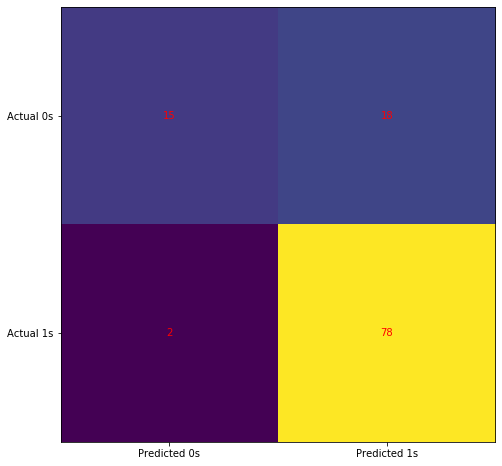

In [44]:
conf_m = confusion_matrix(y_test, predictions)

#confusion matrix plotting
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_m)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_m[i, j], ha='center', va='center', color='red')
plt.show()

In [45]:
model.score(X,y)

0.8156028368794326

In [219]:
report = classification_report(y_test, predictions)
print(f'Classification report is : \n {report}')

Classification report is : 
               precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.81      0.97      0.89        80

    accuracy                           0.82       113
   macro avg       0.85      0.71      0.74       113
weighted avg       0.83      0.82      0.80       113



# Test Data

In [140]:
test_data1 = pd.read_csv(r"C:\Users\shiva\Desktop\Python\Loan_prediction\test_data.csv")    

In [141]:
test_data = test_data1.copy()

In [142]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [143]:
#changind index to Loan_ID
test_data.set_index('Loan_ID', inplace = True)

In [144]:
#changing name of few columns
test_data.rename(columns = {'ApplicantIncome' : 'Applicant_Income', 'CoapplicantIncome' : 'Coapplicant_Income',
                           'LoanAmount' : 'Loan_Amount'}, inplace =  True)

In [145]:
#filling missing values
test_data['Gender'].fillna(value = 'Male', axis = 0, inplace = True)

test_data['Dependents'].fillna(value = '0', axis = 0, inplace = True)

test_data['Self_Employed'].fillna(value = 'No', axis =0, inplace = True)

test_data['Loan_Amount'].fillna(value = 136.4, axis =0, inplace = True)

test_data['Loan_Amount_Term'].fillna(value = 360.0, axis = 0, inplace = True)

test_data['Credit_History'].fillna(value = 1.0, axis = 0, inplace = True)

In [146]:
#changing data types of some variables
test_data['Applicant_Income'] = test_data['Applicant_Income'].astype('float')
test_data['Coapplicant_Income'] = test_data['Coapplicant_Income'].astype('float')
test_data['Credit_History'] = test_data['Credit_History'].astype('uint8')

In [147]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, LP001015 to LP002989
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              367 non-null    object 
 1   Married             367 non-null    object 
 2   Dependents          367 non-null    object 
 3   Education           367 non-null    object 
 4   Self_Employed       367 non-null    object 
 5   Applicant_Income    367 non-null    float64
 6   Coapplicant_Income  367 non-null    float64
 7   Loan_Amount         367 non-null    float64
 8   Loan_Amount_Term    367 non-null    float64
 9   Credit_History      367 non-null    uint8  
 10  Property_Area       367 non-null    object 
dtypes: float64(4), object(6), uint8(1)
memory usage: 31.9+ KB


In [148]:
cat_vars = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(test_data[var], prefix=var)
    data1 = test_data.join(cat_list)
    test_data = data1

In [149]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, LP001015 to LP002989
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   367 non-null    object 
 1   Married                  367 non-null    object 
 2   Dependents               367 non-null    object 
 3   Education                367 non-null    object 
 4   Self_Employed            367 non-null    object 
 5   Applicant_Income         367 non-null    float64
 6   Coapplicant_Income       367 non-null    float64
 7   Loan_Amount              367 non-null    float64
 8   Loan_Amount_Term         367 non-null    float64
 9   Credit_History           367 non-null    uint8  
 10  Property_Area            367 non-null    object 
 11  Gender_Female            367 non-null    uint8  
 12  Gender_Male              367 non-null    uint8  
 13  Married_No               367 non-null    uint8  
 14  Married_Yes        

In [150]:
to_keep_test = test_data.columns[[5,6,7,8,9,12,14,16,17,18,19,22,24,25]]
test_data_final = test_data[to_keep_test]

In [151]:
X_testf = test_data_final

In [152]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, LP001002 to LP002990
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Applicant_Income         564 non-null    float64
 1   Coapplicant_Income       564 non-null    float64
 2   Loan_Amount              564 non-null    float64
 3   Loan_Amount_Term         564 non-null    float64
 4   Credit_History           564 non-null    uint8  
 5   Gender_Male              564 non-null    uint8  
 6   Married_Yes              564 non-null    uint8  
 7   Dependents_1             564 non-null    uint8  
 8   Dependents_2             564 non-null    uint8  
 9   Dependents_3+            564 non-null    uint8  
 10  Education_Graduate       564 non-null    uint8  
 11  Self_Employed_Yes        564 non-null    uint8  
 12  Property_Area_Semiurban  564 non-null    uint8  
 13  Property_Area_Urban      564 non-null    uint8  
dtypes: float64(4), uint

In [153]:
Loan_Pred = model.predict(X_testf)

In [155]:
#adding predictions to original test data
test_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [156]:
test_data1['Loan_Status_Yes'] = Loan_Pred

In [158]:
test_data1['Loan_Status'] = ' '

In [161]:
test_data1['Loan_Status'][test_data1['Loan_Status_Yes'] == 1] = 'Y'

C:\Users\shiva\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [163]:
test_data1['Loan_Status'][test_data1['Loan_Status_Yes'] == 0] = 'N'

C:\Users\shiva\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [167]:
test_data1["Loan_Status"].value_counts()

Y    307
N     60
Name: Loan_Status, dtype: int64

In [168]:
test_data1.drop(labels = 'Loan_Status_Yes', axis = 1, inplace = True)

In [171]:
submission_data = test_data1[['Loan_ID', 'Loan_Status']]

In [ ]:
submission_data.head()

In [173]:
submission_data.to_csv('loan_predictions.csv', index = False)